In [1]:
import sys
import numpy as np
import cv2
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.applications import ResNet50

In [2]:
#load the data
data_path = "train/train/"
im_size=(200,200)
with open("train_annotations","r") as file:
    annofile=file.readline().split("},")
with open("valid_annotations","r") as file:
    validfile=file.readline().split("},")
annofile1=[]
validfile1=[]
#preprocess the annotation data
for i in annofile:
    if i[0]=="[":
        i=i[1:]
    if i[-1] == "]":
        i=i[:-1]
    else:
        i=i+"}"
    i = json.loads(i)
    annofile1.append(i)
for i in validfile:
    if i[0]=="[":
        i=i[1:]
    if i[-1] == "]":
        i=i[:-1]
    else:
        i=i+"}"
    i = json.loads(i)
    validfile1.append(i)

In [3]:
#load the image and the annotation list
peng_train=[]
turt_train=[]
cate_train=[]
peng_test=[]
turt_test=[]
cate_test=[]
x=[]
for i in annofile1:
    cate_train.append(0)
    if i['image_id'] <10:
        file_name ="image_id_00"+str(i['image_id'])
    if i['image_id'] >= 10:
        file_name = "image_id_0" + str(i['image_id'])
    if i['image_id'] >= 100:
        file_name = "image_id_" + str(i['image_id'])
    if i['category_id'] == 1:
        image_path=data_path+file_name+".jpg"
        image=cv2.imread(image_path)
        image=cv2.resize(image,im_size)
        peng_train.append(image)
        x.append(image)
        cate_train[i['image_id']]=1
    if i['category_id'] == 2:
        image_path=data_path+file_name+".jpg"
        image=cv2.imread(image_path)
        image=cv2.resize(image,im_size)
        turt_train.append(image)
        x.append(image)
x_test=[]
data_path="valid/valid/"
for i in validfile1:
    cate_test.append(0)
    if i['image_id'] <10:
        file_name ="image_id_00"+str(i['image_id'])
    if i['image_id'] >= 10:
        file_name = "image_id_0" + str(i['image_id'])
    if i['image_id'] >= 100:
        file_name = "image_id_" + str(i['image_id'])
    if i['category_id'] == 1:
        image_path=data_path+file_name+".jpg"
        image=cv2.imread(image_path)
        image=cv2.resize(image,im_size)
        peng_test.append(image)
        cate_test[i['image_id']]=1
        x_test.append(image)
    if i['category_id'] == 2:
        image_path=data_path+file_name+".jpg"
        image=cv2.imread(image_path)
        image=cv2.resize(image,im_size)
        turt_test.append(image)
        x_test.append(image)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, cate_train, test_size=0.2, random_state=1200)

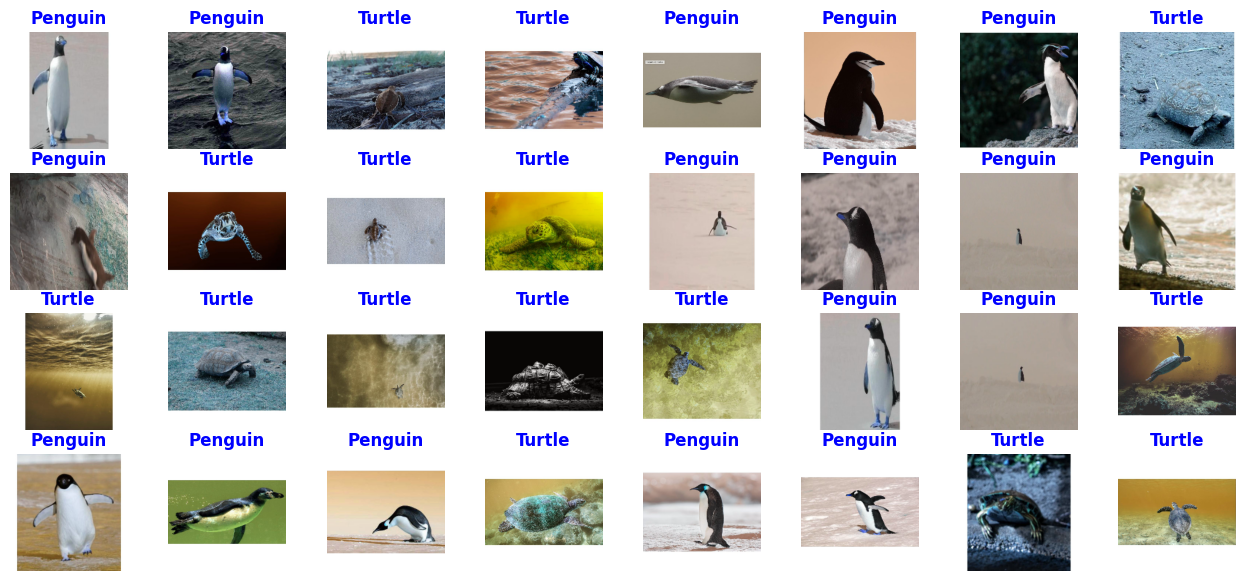

In [4]:
#Show sample images
pointer = -1
figure, axis = plt.subplots(4,8,figsize=(16, 7))
for ax in axis.ravel():
    ax.axis('off')
    pointer+=1
    if cate_train[pointer]==1:
        ax.set_title("Penguin",color = "blue",fontweight='bold')
        ax.imshow(x[pointer])
    else:
        ax.set_title("Turtle",color = "blue",fontweight='bold')
        ax.imshow(x[pointer])


    

In [5]:
#Normalize pixel values
x=np.array(x).reshape(-1,200,200,3)
x_train1=np.array(x_train1).reshape(-1,200,200,3)
x_test1=np.array(x_test1).reshape(-1,200,200,3)
y_train1=np.array(y_train1)
y_test1=np.array(y_test1)
x_test=np.array(x_test).reshape(-1,200,200,3)
cate_train=np.array(cate_train)
cate_test=np.array(cate_test)
x = x/255.0
x_test = x_test/255.0
x_test1 = x_test1/255.0
x_train1 = x_train1/255.0

In [6]:
#Measure of the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = "adam",
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

2023-07-28 15:39:45.781472: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-28 15:39:45.781498: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-28 15:39:45.781501: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-28 15:39:45.781533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-28 15:39:45.781549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
#Training model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc',
    patience=7,
    restore_best_weights=True
)
history=model.fit(x, cate_train, epochs =100, batch_size = 64, validation_data=(x_test,cate_test),callbacks=[early_stopping],verbose=1)
score = model.evaluate(x_test,cate_test,verbose = 0)
print(f"The accuracy is {score[1]}")

Epoch 1/100


2023-07-28 15:39:46.378791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 193ms/step - loss: 0.7538 - acc: 0.5020 - val_loss: 0.6984 - val_acc: 0.5000
Epoch 2/100


2023-07-28 15:39:47.940364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 166ms/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 1s 139ms/step - loss: 0.6879 - acc: 0.5000 - val_loss: 0.6877 - val_acc: 0.5000
Epoch 4/100
8/8 [==============================] - 1s 138ms/step - loss: 0.6779 - acc: 0.6000 - val_loss: 0.6785 - val_acc: 0.5417
Epoch 5/100
8/8 [==============================] - 1s 139ms/step - loss: 0.6404 - acc: 0.7280 - val_loss: 0.6783 - val_acc: 0.5833
Epoch 6/100
8/8 [==============================] - 1s 140ms/step - loss: 0.5710 - acc: 0.7320 - val_loss: 0.9161 - val_acc: 0.5833
Epoch 7/100
8/8 [==============================] - 1s 137ms/step - loss: 0.5848 - acc: 0.7400 - val_loss: 0.7747 - val_acc: 0.5278
Epoch 8/100
8/8 [==============================] - 1s 148ms/step - loss: 0.6145 - acc: 0.6940 - val_loss: 0.9334 - val_acc: 0.5417
Epoch 9/100
8/8 [==============================] - 1s 132ms/step - loss: 0.5611 - acc: 0.7560 -

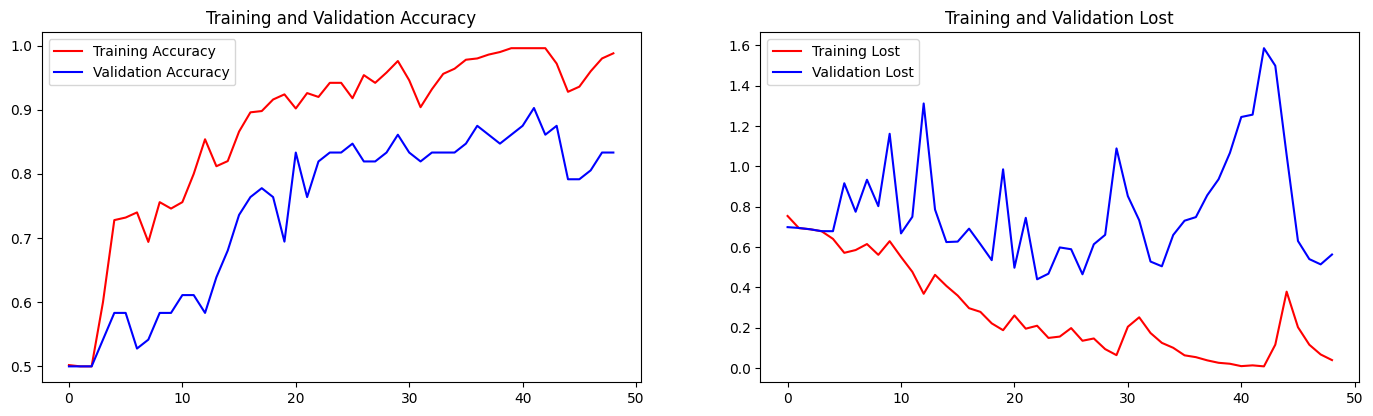

In [8]:
model.save_weights("model.h5")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(17,10))

plt.subplot(221)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(222)
plt.plot(epochs, loss, 'r', label='Training Lost')
plt.plot(epochs, val_loss, 'b', label='Validation Lost')
plt.title('Training and Validation Lost')
plt.legend()
plt.show()

In [9]:
model_out = model.predict(x_test)

3/3 [==============================] - 0s 15ms/step


2023-07-28 15:40:40.751832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


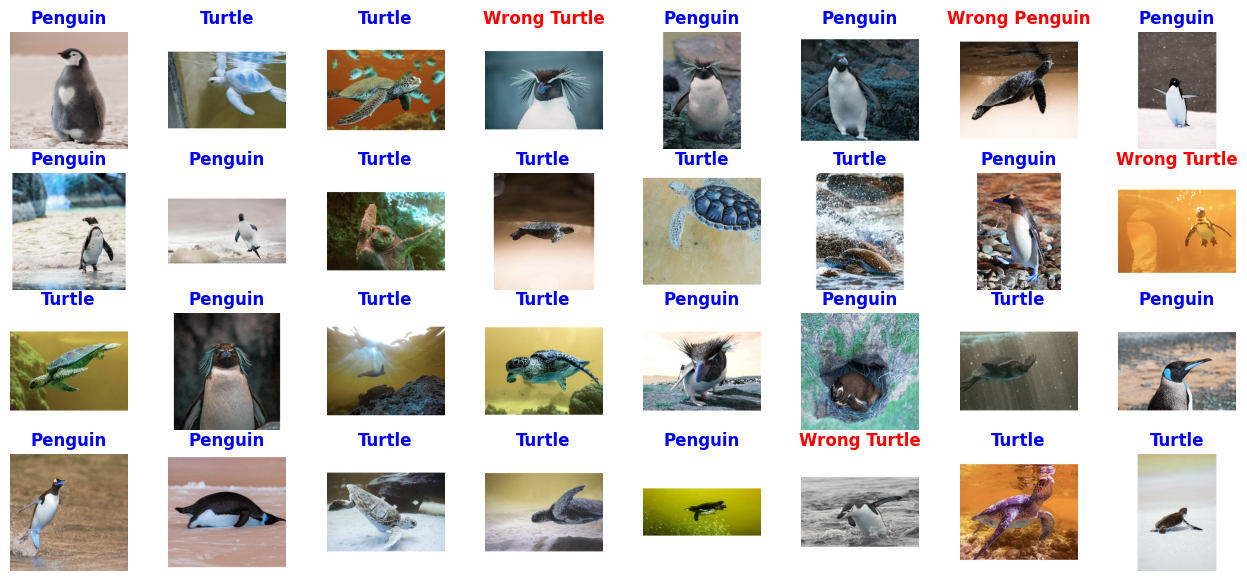

In [10]:
#show some output images
figure, axis = plt.subplots(4,8,figsize=(16, 7))
nm=[]
ax = plt.gca()
for i in model_out:
    if i > 0.5:
        nm.append(1)
    else:nm.append(0)
pointer = -1

for ax in axis.ravel():
    ax.axis('off')
    pointer +=1 
    if nm[pointer] == 1:
        if cate_test[pointer] == 0 :
            ax.set_title("Wrong Penguin",color = "red",fontweight='bold')
        if cate_test[pointer] == 1:
            ax.set_title("Penguin",color = "blue",fontweight='bold')
        ax.imshow(x_test[pointer])
    if nm[pointer] == 0:
        if cate_test[pointer] == 1:
            ax.set_title("Wrong Turtle",color = "red",fontweight='bold')
        if cate_test[pointer] == 0:
            ax.set_title("Turtle",color = "blue",fontweight='bold')
        ax.imshow(x_test[pointer])

[[0.45833333 0.04166667]
 [0.05555556 0.44444444]]


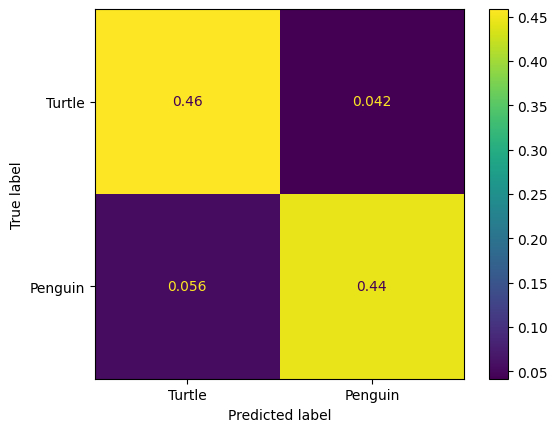

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confmat = confusion_matrix(cate_test, nm,normalize='all')
print(confmat)
cm = ConfusionMatrixDisplay(confmat, display_labels = ['Turtle', 'Penguin'])
cm.plot()

In [12]:
#Detecting animals using fasterrcnn
import torch
import torchvision
from torchvision import transforms, datasets
from torchvision.models.detection import *
from xml.etree import ElementTree as et
import numpy as np
from PIL import Image
import torchvision.models.detection as detection
import cv2
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.eval()

/Users/zhaoyuanwang/miniforge3/envs/tff/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/zhaoyuanwang/miniforge3/envs/tff/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(320,), max_size=640, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block): 

In [13]:
print(dir(FasterRCNN))

['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_call_impl', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_load_from_state_dict', '_maybe_warn_non_full_backward_hook', '_named_members', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_version', 'add_module', 'apply', 'bfloat16', 'buffers', 'call_super_init', 'children', 'cpu', 'cuda', 'double', 'dump_patches', 'eager_outputs', 'eval', 'extra_repr', 'float', 'forward', 'get_buffer', 'get_extra_state', 'get_parameter', 'get_submodule', 'half', 'ipu'

In [14]:
def detect_objects(image_path):
    #preprossesing image data
    image = Image.open(image_path).convert("RGB")
    image = transforms.Compose([
        transforms.ToTensor(),
    ])(image)
    #object detecting
    with torch.no_grad():
        detections = model([image])[0]
    boxes = detections['boxes'].data.cpu().numpy()
    labels = detections['labels'].data.cpu().numpy()
    scores = detections['scores'].data.cpu().numpy()
    mask = scores >= 0.6
    return boxes, labels, scores

In [ ]:
#build the rectangle in the pic and show the image
image_path = "train/train/image_id_367.jpg"
boxes, labels, scores = detect_objects(image_path)
image = cv2.imread(image_path)
for box, label, score in zip(boxes, labels, scores):
        x1, y1, x2, y2 = box.astype(int)
        color = (23,23,255)
        image = cv2.rectangle(image, (x1,y1),(x2,y2),color,2)
cv2.imshow('Detected Turtles or Penguins', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 